In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# 1.) Clean the Apple Data to get a quarterly series of EPS.

In [6]:
y = pd.read_csv("AAPL_quarterly_financials.csv")

In [7]:
y.index = y.name

In [8]:
y = pd.DataFrame(y.loc["BasicEPS", :]).iloc[2:,:]

In [9]:
y.index = pd.to_datetime(y.index)

In [10]:
# CHECK IF NAS ARE NO DIVIDEND PERIOD
y = y.sort_index().fillna(0.)

In [73]:
y

,BasicEPS
2004-03-31,0.002
2004-06-30,0.003
2004-09-30,0.0
2004-12-31,0.013
2005-03-31,0.013
...,...
2022-09-30,1.29
2022-12-31,1.89
2023-03-31,1.53
2023-06-30,1.27


# 2.) Come up with 6 search terms you think could nowcast earnings. (Different than the ones I used) Add in 3 terms that that you think will not Nowcast earnings. Pull in the gtrends data

In [12]:
from pytrends.request import TrendReq

In [13]:
# Create pytrends object
pytrends = TrendReq(hl='en-US', tz=360)

# Set up the keywords and the timeframe
keywords = ["iPhone", "Anroid","Samsung","iPad","Mac","Buy iPhone", "Sell iPhone","UCLA","NBA","Hospital"]  # Add your keywords here
start_date = '2004-01-01'
end_date = '2024-01-01'

# Create an empty DataFrame to store the results
df = pd.DataFrame()

# Iterate through keywords and fetch data
for keyword in keywords:
    pytrends.build_payload([keyword], cat=0, timeframe=f'{start_date} {end_date}', geo='', gprop='')
    interest_over_time_df = pytrends.interest_over_time()
    df[keyword] = interest_over_time_df[keyword]

In [14]:
df = df.resample("Q").mean()

NameError: name 'X' is not defined

In [21]:
# ALIGN DATA

temp = pd.concat([y, df],axis = 1).dropna()
y = temp[["BasicEPS"]].copy()
X = temp.iloc[:,1:].copy()
temp

,BasicEPS,iPhone,Anroid,Samsung,iPad,Mac,Buy iPhone,Sell iPhone,UCLA,NBA,Hospital
2004-03-31,0.002,0.000000,1.333333,24.000000,0.000000,73.333333,0.000000,0.333333,86.666667,15.333333,81.000000
2004-06-30,0.003,0.000000,0.000000,24.000000,0.000000,71.000000,0.333333,1.333333,85.000000,20.333333,80.333333
2004-09-30,0.0,0.000000,0.000000,26.333333,0.000000,67.666667,0.000000,0.000000,75.333333,10.000000,81.000000
2004-12-31,0.013,0.000000,0.000000,29.333333,0.000000,74.333333,0.333333,0.000000,83.000000,17.666667,76.333333
2005-03-31,0.013,0.000000,1.333333,27.666667,0.000000,80.666667,0.000000,0.666667,81.666667,18.333333,83.333333
...,...,...,...,...,...,...,...,...,...,...,...
2022-09-30,1.29,55.666667,12.666667,59.333333,23.000000,41.333333,34.333333,31.000000,32.000000,12.333333,90.000000
2022-12-31,1.89,51.333333,12.333333,57.333333,26.000000,42.000000,34.000000,29.333333,39.666667,39.333333,76.666667
2023-03-31,1.53,49.333333,12.666667,57.000000,23.000000,43.333333,27.000000,27.333333,43.000000,54.000000,88.666667
2023-06-30,1.27,47.666667,11.666667,52.666667,20.666667,38.333333,23.666667,24.333333,29.000000,79.000000,82.666667


# 3.) Normalize all the X data

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
scaler = StandardScaler()

In [51]:
X_scaled = scaler.fit_transform(df)

In [52]:
X_scaled

array([[-1.85621154e+00, -9.03276960e-01, -1.79725983e+00,
        -1.14300633e+00,  4.25792717e-01, -1.79028136e+00,
        -1.51031778e+00,  2.05212166e+00, -7.44063442e-01,
         4.40685326e-01],
       [-1.85621154e+00, -9.47180610e-01, -1.79725983e+00,
        -1.14300633e+00,  2.90767845e-01, -1.77103357e+00,
        -1.44842786e+00,  1.95281359e+00, -4.35939011e-01,
         3.36616780e-01],
       [-1.85621154e+00, -9.47180610e-01, -1.67143611e+00,
        -1.14300633e+00,  9.78751715e-02, -1.79028136e+00,
        -1.53094775e+00,  1.37682676e+00, -1.07272950e+00,
         4.40685326e-01],
       [-1.85621154e+00, -9.47180610e-01, -1.50966275e+00,
        -1.14300633e+00,  4.83660519e-01, -1.77103357e+00,
        -1.53094775e+00,  1.83364390e+00, -6.00272041e-01,
        -2.87794499e-01],
       [-1.85621154e+00, -9.03276960e-01, -1.59953684e+00,
        -1.14300633e+00,  8.50156599e-01, -1.79028136e+00,
        -1.48968781e+00,  1.75419744e+00, -5.59188783e-01,
         8.

# 4.) Run a Lasso with lambda of .5. Plot a bar chart.

In [65]:
from sklearn.linear_model import Lasso

In [69]:
lasso = Lasso(alpha=0.1)
lasso = lasso.fit(X_scaled[:-2],y)

In [70]:
coefficients = lasso.coef_ 

In [71]:
coefficients

array([ 0.08948673, -0.        ,  0.        ,  0.        , -0.25443513,
        0.        ,  0.        , -0.03098448,  0.        ,  0.        ])

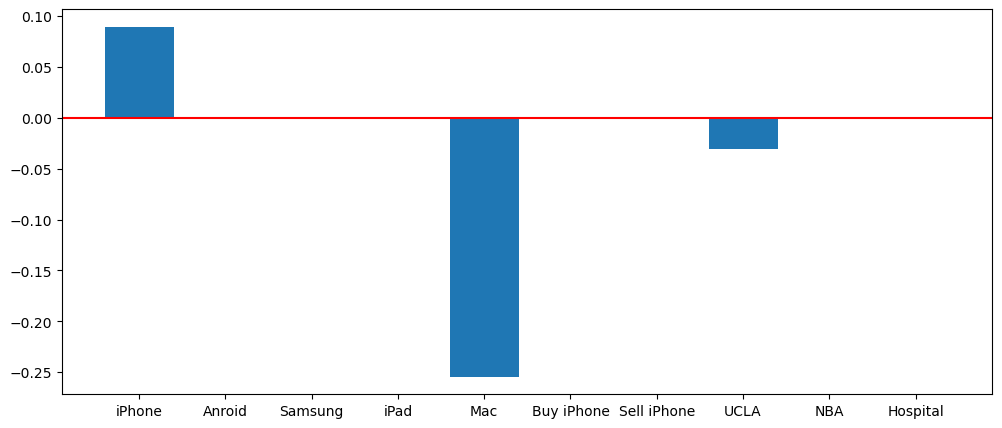

In [72]:
plt.figure(figsize = (12,5))
plt.bar(X.columns, coefficients)
plt.axhline(0, color = "red")
plt.show()

# 5.) Do these coefficient magnitudes make sense?

Yes,the first one iphone make sense. I dont think "Mac" and "UCLA" make any sense